# Credit Card Kaggle - Handle Imbalanced Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

pd.pandas.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
(df['Class'] == 0).mean()

0.9982725143693799

In [7]:
columns = [feature for feature in df.columns.tolist() if feature not in ['Class']]
target = "Class"

# Define a random State
state = np.random.RandomState(42)
print(state)

X = df[columns]
y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

RandomState(MT19937)


In [8]:
len(columns)

30

In [9]:
y.shape

(284807,)

Text(0.5, 1.0, 'Transaction Class Distruction')

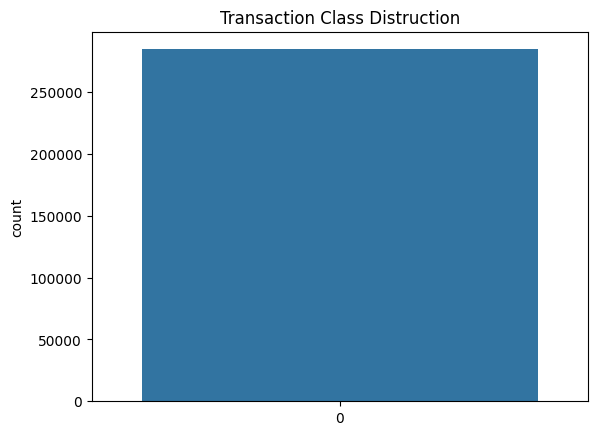

In [10]:
sns.countplot(df['Class'])
plt.title("Transaction Class Distruction")

# Under Sampling

In [11]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     ------------------------------------ 226.0/226.0 kB 863.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from imblearn.under_sampling import NearMiss

In [13]:
X_outliers[0]

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041])

In [14]:
X_outliers[1]

array([0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
       0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249,
       0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
       0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446,
       0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
       0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033])

In [15]:
X_outliers[43]

array([0.39692328, 0.13271575, 0.56754085, 0.68946497, 0.8005867 ,
       0.20015024, 0.16748258, 0.10456784, 0.63643025, 0.70647573,
       0.03158614, 0.93621225, 0.05197128, 0.54129634, 0.70906052,
       0.87096912, 0.71408693, 0.80172808, 0.33945019, 0.81482511,
       0.08011485, 0.89481666, 0.54759238, 0.81729777, 0.45231828,
       0.6435777 , 0.52640266, 0.73158952, 0.08162998, 0.06035208])

# Implementing Undersampling for handling imbalanced

In [16]:
nm = NearMiss()
X_near, Y_near= nm.fit_resample(X, y) # it will generate new X and y based on the count and downsampling of the output feature

In [17]:
X_near.shape, Y_near.shape

((984, 30), (984,))

In [18]:
from collections import Counter
print("Original dataset shape {}".format(Counter(y)))
print("Resampled dataset shape {}".format(Counter(Y_near)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [19]:
X_near.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,76866.0,1.257227,0.408096,0.319266,0.685011,-0.302937,-1.052552,0.136991,-0.245655,-0.079491,-0.304453,0.055638,0.627844,0.968874,-0.435499,1.012926,0.445284,-0.049622,-0.388480,-0.201395,-0.033053,-0.279430,-0.770134,0.119789,0.360130,0.241921,0.092261,-0.018228,0.032361,1.78
1,76868.0,1.254775,0.375340,0.311959,0.691077,-0.343494,-1.065252,0.110222,-0.222721,-0.017278,-0.292722,-0.010006,0.409479,0.553968,-0.352550,1.058069,0.463211,-0.023915,-0.339299,-0.200980,-0.057911,-0.283275,-0.803506,0.124643,0.354395,0.226835,0.093208,-0.021100,0.031686,2.69
2,76870.0,-1.050697,1.500753,0.846326,-0.282956,0.059866,-0.561182,0.484517,0.181547,0.081544,0.613903,1.100861,0.042911,-0.823641,-0.281402,0.364323,0.655438,-0.337470,0.528699,0.240959,0.457988,-0.335560,-0.780232,-0.027029,-0.090180,-0.022896,0.091830,0.547241,0.278780,1.29
3,76866.0,1.245537,0.419648,0.312943,1.111459,-0.205612,-0.950912,0.267398,-0.274685,-0.127708,-0.006219,-0.268366,0.576178,0.725978,0.244139,0.839535,0.014384,-0.467398,-0.241561,-0.375801,-0.098066,0.035687,0.186705,-0.107300,0.417887,0.712330,-0.330843,0.018576,0.021871,3.99
4,76870.0,1.261137,0.304662,0.527018,0.612765,-0.411488,-0.972770,0.112838,-0.248052,-0.068454,-0.087776,-0.091455,0.767559,1.067270,0.089504,0.949708,0.268773,-0.467480,-0.633160,-0.122404,-0.044989,-0.249081,-0.683649,0.126936,0.395307,0.243448,0.092344,-0.024149,0.020589,1.79


In [21]:
df[df.Time == 76866.0].shape

(5, 31)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(1)
knn.fit(X_near, Y_near)

KNeighborsClassifier(n_neighbors=1)